# Graph Data

/Users/Chandler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


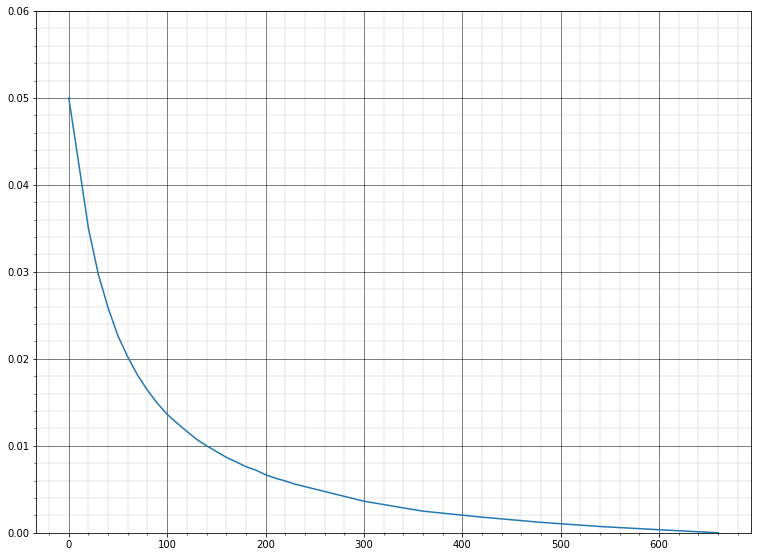

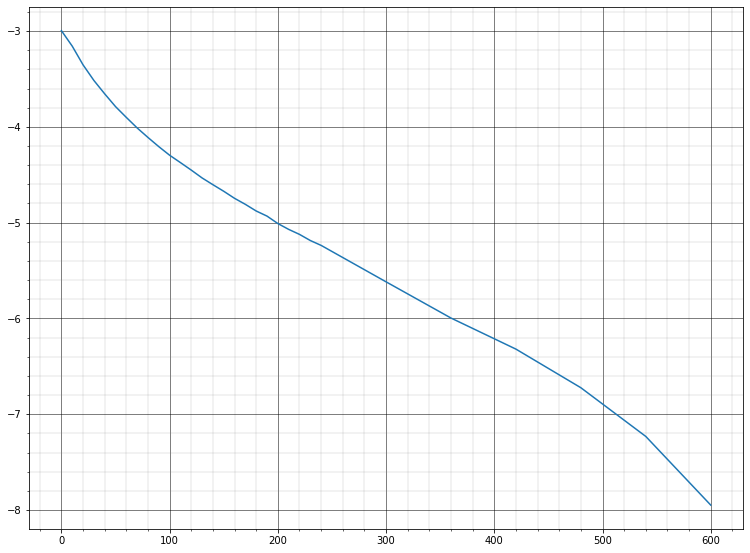

In [11]:
import pandas as pd
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("Data Concentration/47Cdata1.csv")
tf = data["Time (sec)"][len(data["Time (sec)"])-1]

plt.figure(1,figsize=[6.4*2,4.8*2])
plt.plot(data["Time (sec)"],data["Conc Ea (mol/L)"],label="Data")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='gray')
plt.ylim(0,0.06)

# _A = 1/data["Conc Ea (mol/L)"]
_A = np.log(data["Conc Ea (mol/L)"])

plt.figure(2,figsize=[6.4*2,4.8*2])
plt.plot(data["Time (sec)"],_A,label="Data")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='gray')



In [13]:
from scipy.interpolate import interp1d
import pandas as pd
import os

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        temp = pd.DataFrame(columns=["K (s^-1)"])
        temp.to_csv("Kvalues/47CK.csv", index=False, encoding='utf8')
ensure_dir("Kvalues/47CK.csv")
try:
    myKs = pd.read_csv("Kvalues/47CK.csv")
except:
    temp = pd.DataFrame(columns=["K (s^-1)"])
    temp.to_csv("Kvalues/47CK.csv", index=False, encoding='utf8')
    myKs = pd.read_csv("Kvalues/47CK.csv")

dataTerp = interp1d(data["Time (sec)"],_A)
k = (dataTerp(200)-dataTerp(300))/(200-300)
print(k)

-0.006086578730030326
